In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from adjustText import adjust_text
import seaborn as sns
from matplotlib import rcParams


# --- Setup Matplotlib for consistent font rendering ---
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'DejaVu Sans'
%matplotlib inline

In [14]:
Daporinad_pathway = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Data/Daporinad_NAMPT_DEG_pathways.csv")

In [15]:
Daporinad_pathway

,Term,Library,p-value,q-value,z-score,combined score,overlaps
0,BCR signaling (GO),GO_Biological_Process_2021,0.000329,0.17370,13.730,110.10,CD79A;RFTN1;CD38;NCKAP1L
1,BCR Signaling (WP),WikiPathway_2021_Human,0.000387,0.06889,6.841,53.75,CD79A;KLF11;RAC2;HCLS1;CD22;RASGRP3
2,Phagocytosis (GO),GO_Biological_Process_2021,0.000459,0.17370,12.480,95.95,RAC2;ELMO1;ARHGAP25;GULP1
3,actin filament organization (GO:0007015),GO_Biological_Process_2021,0.000763,0.17370,5.021,36.05,MYO1B;DMTN;ELMO1;RAC2;COBL;PPP1R9A;ARHGAP25
4,Rac signal td,GO_Biological_Process_2021,0.000800,0.17370,19.220,137.10,ELMO1;RAC2;CDH13
5,miRNA targets,WikiPathway_2021_Human,0.001244,0.11070,16.190,108.30,COL1A2;COL5A1;ITGA11
6,CD22 Mediated BCR Reg,Reactome_2022,0.001397,0.42720,51.030,335.50,CD79A;CD22
7,AMPK Inhibits chREBP Tc Activity,Reactome_2022,0.002574,0.42720,34.020,202.80,MLXIPL;PRKAA2
8,Nef And Signal Td,Reactome_2022,0.002574,0.42720,34.020,202.80,ELMO1;DOCK2
9,Hematopoietic cell lineage,KEGG_2021_Human,0.002919,0.37250,5.489,32.04,ITGA4;MME;CD38;IL7R;CD22


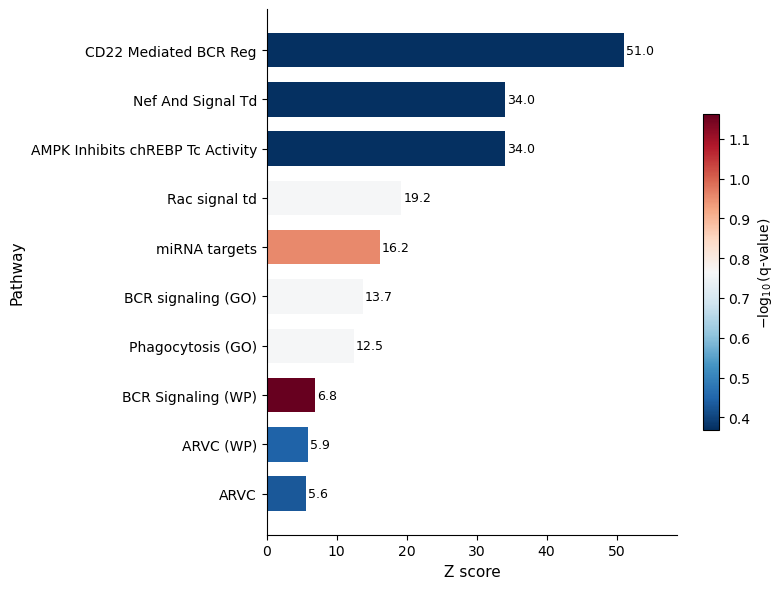

In [ ]:
# Select top pathways and prepare data
# Sort by z-score and select top 10
top_pathways = Daporinad_pathway.nlargest(10, 'z-score').copy()

# Calculate -log10(q-value)
top_pathways['-log10_qvalue'] = -np.log10(top_pathways['q-value'])

# Sort by z-score for plotting (ascending so highest appears at top)
top_pathways = top_pathways.sort_values('z-score', ascending=True)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create colormap normalization
norm = plt.Normalize(vmin=top_pathways['-log10_qvalue'].min(), 
                     vmax=top_pathways['-log10_qvalue'].max())
#norm = plt.Normalize(vmin=0, vmax=1.2)  # example fixed scale


cmap = plt.cm.RdBu_r  # Red-Blue reversed (blue=low, red=high)

# Get colors for each bar based on -log10(q-value)
colors = cmap(norm(top_pathways['-log10_qvalue'].values))

# Create horizontal bar plot
bars = ax.barh(y=range(len(top_pathways)), 
               width=top_pathways['z-score'].values,
               color=colors,
               edgecolor='none',
               height=0.7)

# Set y-tick labels (pathway names)
# Clean up pathway names by removing extra info in parentheses if too long
pathway_labels = top_pathways['Term'].values
ax.set_yticks(range(len(top_pathways)))
ax.set_yticklabels(pathway_labels, fontsize=10)

# Add value labels at the end of each bar
for i, (bar, val) in enumerate(zip(bars, top_pathways['z-score'].values)):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}', va='center', ha='left', fontsize=9)

# Set labels
ax.set_xlabel('Z score', fontsize=11)
ax.set_ylabel('Pathway', fontsize=11)

# Set x-axis limits to accommodate labels
ax.set_xlim(0, top_pathways['z-score'].max() * 1.15)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=20)
cbar.set_label(r'$-\log_{10}$(q-value)', fontsize=10)

plt.tight_layout()
plt.savefig('/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Code/Daporinad_pathway_barplot.pdf', 
            dpi=300, bbox_inches='tight')
plt.show()